In [1]:
import numpy as np
import scipy.stats 
import networkx as nx
import geopandas as gpd
import matplotlib.pyplot as plt
import wntr
import pandas as pd

In [2]:
wn=wntr.network.WaterNetworkModel('Net3.inp')

In [3]:
wn.add_junction('new_junction',base_demand=0.0,demand_pattern=None,elevation=0.0,coordinates=None,demand_category=None)

In [4]:
wntr.network.write_inpfile(wn,'Net3_LPS.inp',units='LPS')

In [6]:
wn2=wntr.network.read_inpfile('Net3_LPS.inp')

In [8]:
wn2.add_junction('new_junction',base_demand=0.0,demand_pattern=None,elevation=0.0,coordinates=None,demand_category=None)

# I/O 

In [9]:
# Dictionary

wn_dict=wn.to_dict()

In [10]:
wn_dict

{'version': 'wntr-1.1.0',
 'comment': 'WaterNetworkModel - all values given in SI units',
 'name': 'Net3.inp',
 'options': {'time': {'duration': 86400.0,
   'hydraulic_timestep': 3600,
   'quality_timestep': 300,
   'rule_timestep': 360,
   'pattern_timestep': 3600,
   'pattern_start': 0.0,
   'report_timestep': 3600,
   'report_start': 0.0,
   'start_clocktime': 0.0,
   'statistic': 'NONE',
   'pattern_interpolation': False},
  'hydraulic': {'headloss': 'H-W',
   'hydraulics': None,
   'hydraulics_filename': None,
   'viscosity': 1.0,
   'specific_gravity': 1.0,
   'pattern': '1',
   'demand_multiplier': 1.0,
   'demand_model': 'DDA',
   'minimum_pressure': 0.0,
   'required_pressure': 0.07,
   'pressure_exponent': 0.5,
   'emitter_exponent': 0.5,
   'trials': 40,
   'accuracy': 0.001,
   'unbalanced': 'CONTINUE',
   'unbalanced_value': 10,
   'checkfreq': 2,
   'maxcheck': 10,
   'damplimit': 0.0,
   'headerror': 0.0,
   'flowchange': 0.0,
   'inpfile_units': 'GPM',
   'inpfile_press

In [11]:
wn_dict.keys()

dict_keys(['version', 'comment', 'name', 'options', 'curves', 'patterns', 'nodes', 'links', 'sources', 'controls'])

In [12]:
wn=wntr.network.from_dict(wn_dict)

In [13]:
wn

In [14]:
wntr.network.write_json(wn,'Net3.json')

In [15]:
wn=wntr.network.read_json('Net3.json')

In [16]:
# Convert network innto multidigraph

m=wntr.network.to_graph(wn)

In [17]:
print(m)

MultiDiGraph with 98 nodes and 119 edges


In [18]:
wn_gis=wntr.network.to_gis(wn)

In [20]:
wn_gis.junctions

,node_type,elevation,initial_quality,geometry
10,Junction,44.80560,0.0,POINT (9 27.85)
15,Junction,9.75360,0.0,POINT (38.68 23.76)
20,Junction,39.31920,0.0,POINT (29.44 26.91)
35,Junction,3.81000,0.0,POINT (25.46 10.52)
40,Junction,40.20312,0.0,POINT (27.02 9.81)
...,...,...,...,...
269,Junction,0.00000,0.0,POINT (25.03 12.14)
271,Junction,1.82880,0.0,POINT (25.97 11)
273,Junction,2.43840,0.0,POINT (29.16 7.38)
275,Junction,3.04800,0.0,POINT (31.07 8.29)


In [22]:
wn_gis.tanks

,node_type,elevation,initial_quality,diameter,init_level,max_level,min_level,min_vol,overflow,geometry
1,Tank,40.20312,0.0,25.9080,3.99288,9.78408,0.03048,0.0,False,POINT (27.46 9.84)
2,Tank,35.50920,0.0,15.2400,7.16280,12.28344,1.98120,0.0,False,POINT (32.99 3.45)
3,Tank,39.31920,0.0,49.9872,8.83920,10.82040,1.21920,0.0,False,POINT (29.41 27.27)


In [23]:
wn_gis.pipes

,link_type,start_node_name,end_node_name,check_valve,diameter,initial_status,length,minor_loss,roughness,geometry
20,Pipe,3,20,False,2.5146,Open,30.1752,0.0,199.0,"LINESTRING (29.41 27.27, 29.44 26.91)"
40,Pipe,1,40,False,2.5146,Open,30.1752,0.0,199.0,"LINESTRING (27.46 9.84, 27.02 9.81)"
50,Pipe,2,50,False,2.5146,Open,30.1752,0.0,199.0,"LINESTRING (32.99 3.45, 33.01 3.01)"
60,Pipe,River,60,False,0.6096,Open,375.2088,0.0,140.0,"LINESTRING (24.15 31.06, 23.9 29.94)"
101,Pipe,10,101,False,0.4572,Open,4328.1600,0.0,110.0,"LINESTRING (9 27.85, 13.81 22.94)"
...,...,...,...,...,...,...,...,...,...,...
323,Pipe,201,275,False,0.3048,Open,91.4400,0.0,130.0,"LINESTRING (30.89 8.57, 31.07 8.29)"
325,Pipe,269,271,False,0.2032,Open,393.1920,0.0,130.0,"LINESTRING (25.03 12.14, 25.97 11)"
329,Pipe,61,123,False,0.7620,Open,13868.4000,0.0,140.0,"LINESTRING (23.71 29.03, 23.37 27.31)"
330,Pipe,60,601,False,0.7620,Closed,0.3048,0.0,140.0,"LINESTRING (23.9 29.94, 23 29.49)"


In [24]:
wn=wntr.network.from_gis(wn_gis)

In [25]:
wn

In [26]:
wntr.network.write_geojson(wn,'Net3')

/home/wahab901278/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/home/wahab901278/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/home/wahab901278/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/home/wahab901278/anaconda3/lib/python3.11/site-packages/pyogrio/raw.py:698: UserWarning: 'crs' was not provided.  The output dataset will not have projection information defined and may not be usable in other systems.
  warnings.warn(
/home/wahab901278/anaconda3/lib/python3.11/site-packages

In [29]:
geojson_files={
    'tanks':'Net3_tanks.geojson',
    'reservoirs':'Net3_reservoirs.geojson',
    
}
wn=wntr.network.read_geojson(geojson_files)

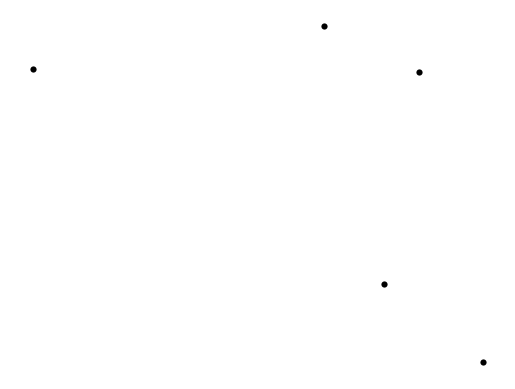

<Axes: >

In [32]:
wntr.graphics.plot_network(wn)

In [34]:
n=wntr.network.io.valid_gis_names()

In [35]:
n['junctions']

['name',
 'elevation',
 'coordinates',
 'emitter_coefficient',
 'initial_quality',
 'minimum_pressure',
 'required_pressure',
 'pressure_exponent',
 'tag']

# SIMULATIONS

In [3]:
wn.options.hydraulic.demand_model='PDD'
wn.options.hydraulic.required_pressure=20
wn.options.hydraulic.minimum_pressure=2
print(wn.options.hydraulic)

HydraulicOptions(headloss='H-W', hydraulics=None, hydraulics_filename=None, viscosity=1.0, specific_gravity=1.0, pattern='1', demand_multiplier=1.0, demand_model='PDA', minimum_pressure=2.0, required_pressure=20.0, pressure_exponent=0.5, emitter_exponent=0.5, trials=40, accuracy=0.001, unbalanced='CONTINUE', unbalanced_value=10, checkfreq=2, maxcheck=10, damplimit=0.0, headerror=0.0, flowchange=0.0, inpfile_units='GPM', inpfile_pressure_units=None)


In [4]:
simulator=wntr.sim.EpanetSimulator(wn)
results_EPANET=simulator.run_sim()

In [5]:
simulator=wntr.sim.WNTRSimulator(wn)
results_WNTR=simulator.run_sim()

In [6]:
results_EPANET.link.keys()

dict_keys(['quality', 'flowrate', 'velocity', 'headloss', 'status', 'setting', 'friction_factor', 'reaction_rate'])

In [7]:
results_WNTR

In [8]:
results_EPANET.node['pressure'].head()

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,-0.450080,28.593636,8.839204,40.612465,3.992880,7.162800,63.706444,92.187874,92.187874,31.553921,...,38.151539,44.650833,42.623013,40.477547,39.655285,0.0,0.0,3.992880,7.162800,8.839199
3600,28.253716,28.887127,9.099179,41.513763,4.191198,6.752890,63.751488,92.490318,92.490318,39.867863,...,39.722359,45.767292,43.530811,41.041168,40.189747,0.0,0.0,4.191198,6.752890,9.099170
7200,28.764303,30.003204,9.450781,42.429096,4.620549,6.369755,63.793495,92.773643,92.773643,41.517052,...,40.730839,46.730690,44.450718,41.956619,41.098690,0.0,0.0,4.620549,6.369755,9.450771
10800,28.871414,30.415548,9.869704,42.817165,5.158953,6.534982,63.813141,92.906601,92.906601,41.862648,...,41.116512,47.115627,44.837067,42.284958,41.419250,0.0,0.0,5.158953,6.534982,9.869690
14400,29.659277,31.970718,10.284725,44.297867,5.665968,6.740026,63.877914,93.346970,93.346970,44.400738,...,42.755882,48.670082,46.327454,43.938843,43.075657,0.0,0.0,5.665964,6.740026,10.284706


In [55]:
results_WNTR.node['pressure'].head()

,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,1,2,3,River,Lake
0,-0.450073,28.593627,8.839205,40.612469,3.992880,7.162800,63.706435,92.187892,92.187892,31.553927,...,38.151548,44.650843,42.623016,40.477541,39.655276,3.992880,7.162800,8.839200,0.0,0.0
3600,28.253711,28.887126,9.099182,41.513749,4.191189,6.752903,63.751481,92.490337,92.490337,39.867815,...,39.722347,45.767286,43.530803,41.041153,40.189726,4.191188,6.752903,9.099173,0.0,0.0
7200,28.764331,30.003203,9.450788,42.429091,4.620535,6.369759,63.793484,92.773662,92.773662,41.517107,...,40.730854,46.730696,44.450717,41.956614,41.098682,4.620533,6.369759,9.450775,0.0,0.0
10800,28.871435,30.415546,9.869710,42.817159,5.158938,6.534979,63.813132,92.906626,92.906626,41.862691,...,41.116520,47.115631,44.837063,42.284947,41.419238,5.158937,6.534979,9.869697,0.0,0.0
14400,29.659301,31.970718,10.284735,44.297865,5.665951,6.740015,63.877903,93.346995,93.346995,44.400792,...,42.755896,48.670089,46.327456,43.938838,43.075648,5.665949,6.740015,10.284715,0.0,0.0


In [56]:
diff=results_EPANET.node['pressure']-results_WNTR.node['pressure']

In [57]:
diff

,1,10,101,103,105,107,109,111,113,115,...,275,3,35,40,50,60,601,61,Lake,River
0,-1.324463e-07,-0.000006,-0.000006,-0.000009,-0.000012,-0.000010,-0.000006,-0.000010,-0.000009,-0.000015,...,0.000009,-9.338379e-07,-0.000004,-4.203322e-07,-9.313368e-09,8.842331e-06,-1.854481e-05,-1.854481e-05,0.0,0.0
3600,1.030910e-05,0.000004,0.000048,0.000055,0.000080,0.000081,0.000057,0.000058,0.000045,0.000070,...,0.000021,-2.822045e-06,0.000014,9.113696e-06,-1.290772e-05,6.863832e-06,-1.900072e-05,-1.900072e-05,0.0,0.0
7200,1.543522e-05,-0.000027,-0.000055,-0.000050,-0.000060,-0.000055,-0.000046,-0.000033,-0.000032,-0.000031,...,0.000008,-4.080882e-06,0.000005,1.361970e-05,-4.064475e-06,1.073927e-05,-1.856889e-05,-1.856889e-05,0.0,0.0
10800,1.610291e-05,-0.000021,-0.000043,-0.000037,-0.000037,-0.000038,-0.000033,-0.000023,-0.000019,-0.000024,...,0.000013,-7.520541e-06,0.000006,1.447802e-05,3.305202e-06,9.340352e-06,-2.523406e-05,-2.523406e-05,0.0,0.0
14400,1.502424e-05,-0.000024,-0.000054,-0.000049,-0.000049,-0.000047,-0.000039,-0.000033,-0.000036,-0.000038,...,0.000009,-9.369201e-06,0.000002,1.644870e-05,1.017864e-05,1.150823e-05,-2.582735e-05,-2.582735e-05,0.0,0.0
18000,-8.239265e-05,-0.000045,-0.000121,-0.000117,-0.000127,-0.000125,-0.000114,-0.000121,-0.000113,-0.000121,...,-0.000079,-1.324435e-04,-0.000090,-8.269843e-05,-5.336464e-05,4.228128e-07,-5.961548e-06,-4.716515e-06,0.0,0.0
21600,-8.154132e-05,-0.000045,-0.000113,-0.000117,-0.000126,-0.000121,-0.000117,-0.000117,-0.000114,-0.000118,...,-0.000077,-1.265998e-04,-0.000088,-8.188752e-05,-5.367382e-05,-1.071460e-05,-7.435976e-06,-4.157350e-06,0.0,0.0
25200,-8.137297e-05,-0.000043,-0.000109,-0.000103,-0.000113,-0.000109,-0.000102,-0.000107,-0.000104,-0.000107,...,-0.000069,-1.233941e-04,-0.000081,-8.148007e-05,-5.618801e-05,-4.488550e-06,-2.688469e-06,-8.517783e-06,0.0,0.0
28800,-7.550899e-05,-0.000044,-0.000116,-0.000115,-0.000118,-0.000118,-0.000111,-0.000109,-0.000110,-0.000113,...,-0.000074,-1.228943e-04,-0.000084,-7.568837e-05,-5.461865e-05,-8.910520e-06,-9.831719e-06,-3.123525e-06,0.0,0.0
32400,-7.496205e-05,-0.000043,-0.000109,-0.000106,-0.000114,-0.000108,-0.000103,-0.000107,-0.000099,-0.000107,...,-0.000071,-1.211141e-04,-0.000081,-7.496327e-05,-5.511053e-05,-8.538042e-07,-2.410721e-06,-3.967638e-06,0.0,0.0


<Axes: title={'center': 'Max pressure difference'}>

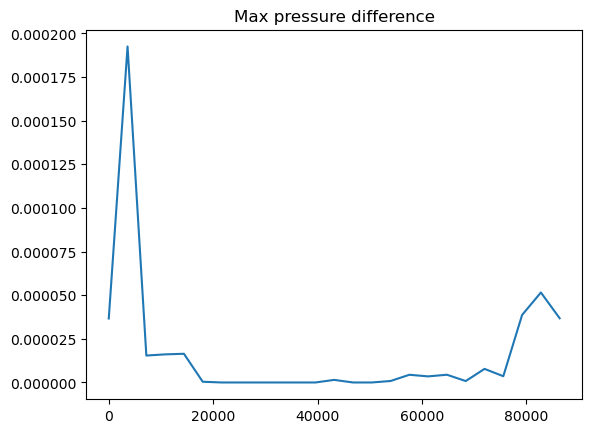

In [58]:
diff.max(axis=1).plot(title='Max pressure difference')

# Time series

Text(0, 0.5, 'Tank Level(m)')

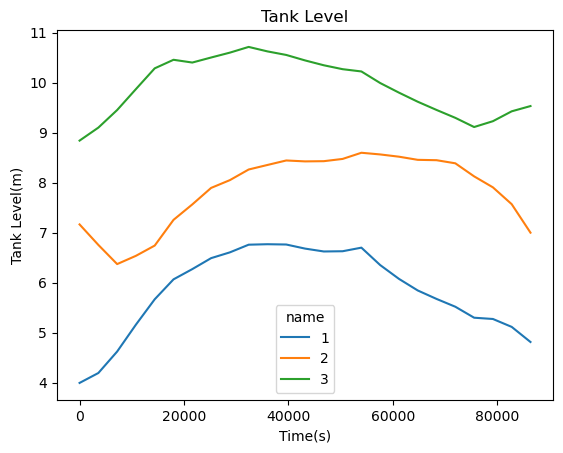

In [59]:
# plot time series for tank levels

tank_levels=results_EPANET.node['pressure'].loc[:,wn.tank_name_list]
plot=tank_levels.plot(title='Tank Level')
plot.set_xlabel('Time(s)')
plot.set_ylabel('Tank Level(m)')

Text(0, 0.5, 'flow rates(m$^3$/s)')

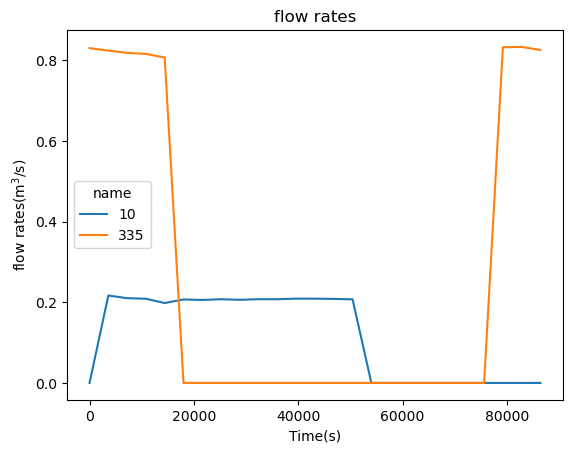

In [60]:
# plot time series for tank levels

pump_flowrates=results_EPANET.link['flowrate'].loc[:,wn.pump_name_list]
plot=pump_flowrates.plot(title='flow rates')
plot.set_xlabel('Time(s)')
plot.set_ylabel('flow rates(m$^3$/s)')

ValueError: 'c' argument has 1940 elements, which is inconsistent with 'x' and 'y' with size 97.

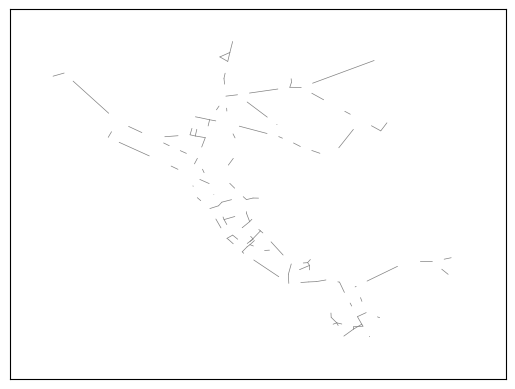

In [15]:
# plot time series for tank levels

pressure_at_5_hr=results_EPANET.node['pressure'].loc[5*3600:]
wntr.graphics.plot_network(wn,node_attribute=pressure_at_5_hr)

In [14]:
help(wntr.graphics.plot_network)

Help on function plot_network in module wntr.graphics.network:

plot_network(wn, node_attribute=None, link_attribute=None, title=None, node_size=20, node_range=[None, None], node_alpha=1, node_cmap=None, node_labels=False, link_width=1, link_range=[None, None], link_alpha=1, link_cmap=None, link_labels=False, add_colorbar=True, node_colorbar_label='Node', link_colorbar_label='Link', directed=False, ax=None, filename=None)
    Plot network graphic
        
    Parameters
    ----------
    wn : wntr WaterNetworkModel
        A WaterNetworkModel object
                
    node_attribute : None, str, list, pd.Series, or dict, optional
        
        - If node_attribute is a string, then a node attribute dictionary is
          created using node_attribute = wn.query_node_attribute(str)
        - If node_attribute is a list, then each node in the list is given a 
          value of 1.
        - If node_attribute is a pd.Series, then it should be in the format
          {nodeid: x} where

In [16]:
wn.reset_initial_values()

# RESILIENCE METRICS

## TOPOGRAPHIC

In [17]:
G=wn.to_graph()

In [18]:
print(G)

MultiDiGraph with 97 nodes and 119 edges


In [19]:
uG=G.to_undirected()

In [20]:
nx.Graph(uG)

## HYDRAULIC

In [21]:
wn.options.hydraulic.demand_model='PDD'
wn.options.hydraulic.required_pressure=50

In [22]:
sim=wntr.sim.EpanetSimulator(wn)
results=sim.run_sim()

In [23]:
expected_demand=wntr.metrics.expected_demand(wn)

In [25]:
delivered_demand=results.node['demand'].loc[:,wn.junction_name_list]

In [31]:
wsa=wntr.metrics.water_service_availability(expected_demand.sum(axis=0),delivered_demand.sum(axis=0))

In [32]:
wsa

name
10          NaN
15     0.824799
20          NaN
35     0.923780
40          NaN
         ...   
267         NaN
269         NaN
271         NaN
273         NaN
275         NaN
Length: 92, dtype: float64

## Water Quality

In [35]:
wn.options.quality.parameter='AGE'

In [36]:
sim=wntr.sim.EpanetSimulator(wn)
results=sim.run_sim()

In [37]:
age=results.node['quality']

In [38]:
age

name,10,15,20,35,40,50,60,601,61,101,...,267,269,271,273,275,River,Lake,1,2,3
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
3600,3600.0,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,132.211380,3600.000000,132.211441,3600.000000,...,3600.000000,3600.000000,3600.000000,3600.000000,3600.000000,0.0,0.0,3600.000000,3600.000000,3600.000000
7200,0.0,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,133.375122,7200.000000,133.375397,3627.019043,...,7200.000000,7200.000000,7200.000000,7200.000000,7200.000000,0.0,0.0,7200.000000,7200.000000,7200.000000
10800,0.0,10799.832031,9611.326172,10793.832031,10796.741211,10799.999023,134.345093,10800.000000,134.345520,3426.046875,...,10795.810547,10791.656250,10792.799805,10797.841797,10797.852539,0.0,0.0,10799.975586,10800.000000,10795.665039
14400,0.0,14398.074219,11269.690430,12849.031250,13223.855469,14399.936523,223.878937,224.163116,224.447281,3399.089600,...,9466.033203,12546.607422,12655.958008,14231.434570,13975.832031,0.0,0.0,14399.565430,14400.000000,14357.262695
18000,0.0,17915.972656,13608.441406,13525.289062,12549.676758,17997.171875,225.641418,225.927826,226.214233,3478.537354,...,8898.955078,12971.512695,13360.802734,15442.887695,15917.144531,0.0,0.0,17960.916016,17999.990234,17919.531250
21600,0.0,20233.898438,16902.671875,14552.564453,12220.859375,21590.033203,223.818863,224.102951,224.387054,3449.887695,...,8904.277344,13763.087891,14401.139648,16561.599609,17274.513672,0.0,0.0,21416.798828,21599.935547,21514.195312
25200,0.0,22938.140625,17250.851562,15753.991211,12876.448242,24101.671875,226.992859,227.280975,227.569077,3477.186035,...,8999.365234,14075.017578,15609.261719,18080.472656,18623.812500,0.0,0.0,24735.066406,25199.740234,25044.488281
28800,0.0,26317.027344,17441.316406,17071.384766,12051.495117,26161.099609,227.725555,228.014618,228.303650,3449.264404,...,9547.085938,16219.750000,16920.582031,19096.726562,19774.675781,0.0,0.0,28079.761719,28799.628906,28536.878906
32400,0.0,29917.027344,20122.468750,18043.818359,15143.815430,25855.898438,186.000000,186.402496,186.804901,3424.311523,...,9120.465820,17654.699219,17812.601562,20016.042969,21041.980469,0.0,0.0,31223.707031,32399.474609,32014.373047


In [40]:
age_48hr=age.loc[age.index[-1]-48*3600:age.index[-1]]
average_age=age_48hr.mean()/3600

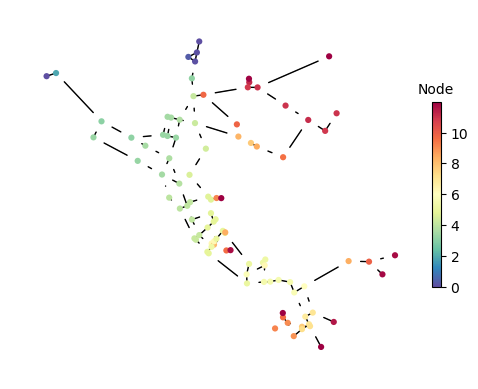

<Axes: >

In [41]:
wntr.graphics.plot_network(wn,node_attribute=average_age)

In [57]:
pop=wntr.metrics.population(wn)


In [59]:
threshold=24
pop_impacted=wntr.metrics.population_impacted(pop,average_age,np.greater,threshold)

In [60]:
pop_impacted

1        NaN
10       0.0
101      0.0
103      0.0
105      0.0
        ... 
60       0.0
601      0.0
61       0.0
Lake     NaN
River    NaN
Length: 97, dtype: float64

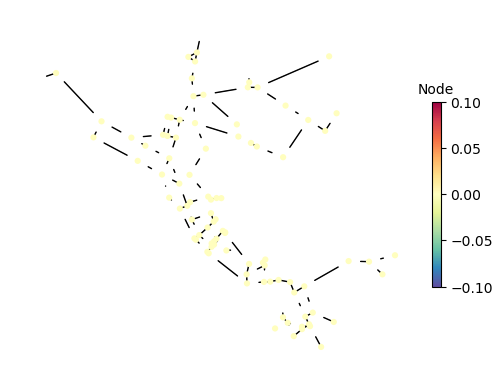

<Axes: >

In [61]:
wntr.graphics.plot_network(wn,node_attribute=pop_impacted)

# Fragility curves

In [62]:
FC=wntr.scenario.FragilityCurve()

In [63]:
help(FC.add_state)

Help on method add_state in module wntr.scenario.fragility_curve:

add_state(name, priority=0, distribution={}) method of wntr.scenario.fragility_curve.FragilityCurve instance
    Add a damage state distribution
    
    Parameters
    ----------
    name : string
        Name of the damage state
    
    priority : int
        Damage state priority
    
    distribution : dict, key = string, value = scipy.stats statistical function
        'Default' can be used to specificy all location



## NETWORK SKELETONIZATION

In [64]:
wn=wntr.network.WaterNetworkModel('Net6.inp')

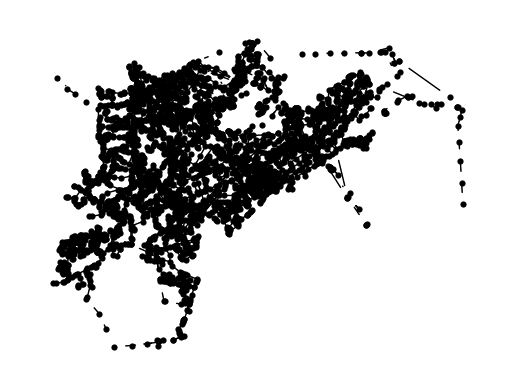

<Axes: >

In [65]:
wntr.graphics.plot_network(wn)

In [87]:
wn.describe(level=1)

{'Nodes': {'Junctions': 3323, 'Tanks': 32, 'Reservoirs': 1},
 'Links': {'Pipes': 3829, 'Pumps': 61, 'Valves': 2},
 'Patterns': 3,
 'Curves': {'Pump': 60, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 124}

In [104]:
simulator=wntr.sim.EpanetSimulator(wn)
results_EPANET=simulator.run_sim()

In [106]:
skel_wn=wntr.morph.skeletonize(wn,pipe_diameter_threshold=10)

In [107]:
wn.describe(level=1)

{'Nodes': {'Junctions': 3323, 'Tanks': 32, 'Reservoirs': 1},
 'Links': {'Pipes': 3829, 'Pumps': 61, 'Valves': 2},
 'Patterns': 3,
 'Curves': {'Pump': 60, 'Efficiency': 0, 'Headloss': 0, 'Volume': 0},
 'Sources': 0,
 'Controls': 124}

In [103]:
results_EPANET.link['flowrate']

name,LINK-0,LINK-1,LINK-2,LINK-3,LINK-4,LINK-5,LINK-6,LINK-7,LINK-8,LINK-9,...,PUMP-3882,PUMP-3883,PUMP-3884,PUMP-3885,PUMP-3886,PUMP-3887,PUMP-3888,PUMP-3889,VALVE-3890,VALVE-3891
0,1.424698,0.105968,1.318730,0.105968,0.099996,0.005972,0.003029,0.001612,0.098820,0.066351,...,0.016544,0.0,0.0,0.089253,0.013604,0.0,0.0,0.037036,0.0,0.009864
3600,1.424402,0.103006,1.321396,0.103006,0.097542,0.005464,0.002771,0.001475,0.096466,0.064360,...,0.000000,0.0,0.0,0.086760,0.000000,0.0,0.0,0.036914,0.0,0.009026
7200,1.418388,0.095852,1.322536,0.095852,0.091552,0.004300,0.002181,0.001161,0.090706,0.059540,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.036682,0.0,0.007102
10800,1.411453,0.089042,1.322410,0.089042,0.085818,0.003225,0.001635,0.000871,0.085183,0.054914,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.032657,0.0,0.005327
14400,1.404979,0.084169,1.320811,0.084169,0.081690,0.002478,0.001257,0.000669,0.081202,0.051589,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.032185,0.0,0.004094
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331200,0.765735,0.053514,0.712222,0.053514,0.051782,0.001732,0.000878,0.000468,0.051441,0.035126,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.036025,0.0,0.002861
334800,0.767992,0.056678,0.711313,0.056678,0.054439,0.002239,0.001136,0.000605,0.053998,0.037279,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.035882,0.0,0.003699
338400,0.772428,0.063833,0.708595,0.063833,0.060399,0.003434,0.001741,0.000927,0.059723,0.042073,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.035799,0.0,0.005672
342000,0.778317,0.072941,0.705376,0.072941,0.067835,0.005106,0.002589,0.001378,0.066830,0.047886,...,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.0,0.035912,0.0,0.008434
